<a href="https://colab.research.google.com/github/Grivine-19/Coronavirus-Sentiment-Analysis-Kenya/blob/master/Coronavirus_EDA_Kenya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Exploratory Data Analysis**</center>

*Here, we clean and visualize data from Data_Extraction.ipynb file to gain insights on the kind of data we are dealing with.*

In [47]:
#Import Visualization Libraries

from google.colab import drive
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import re
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Import data cleaning Libraries

from html.parser import HTMLParser

In [5]:
#Mount the google drive folder

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# <center>**Nairobi EDA**</center>

In [10]:
#Load the dataframe

nairobi_tweets = pd.read_csv('/content/gdrive/My Drive/Tweets/nairobi.csv')

nairobi_tweets.head()

,Unnamed: 0,ID,DATE,TWEET,LOCATION,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,NaN,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",NaN,28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,NaN,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,NaN,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,NaN,0,0,#COVID19KE


In [13]:
#List the column names

for col in nairobi_tweets:
  print (col)

Unnamed: 0
ID
DATE
TWEET
LOCATION
RETWEETS
FAVORITES
HASHTAGS


In [ ]:
#Drop the 'location' and 'Unnamed 0:' columns from the df

nairobi_tweets.drop(["Unnamed: 0", "LOCATION"], axis = 1, inplace = True) 

In [20]:
# Save the updated dataframe to a new csv file

nairobi_tweets.to_csv('/content/gdrive/My Drive/Tweets/nairobi_final.csv')

In [23]:
#Load the updated csv file

new_df = pd.read_csv('/content/gdrive/My Drive/Tweets/nairobi_final.csv')

#get the shape of the dataframe
#new_df.dhape
new_df.head()  #the Unnamed: 0 column does not delete, it resulted from the merged datasets of tweets fetched from Nairobi.

,Unnamed: 0,ID,DATE,TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,0,0,#COVID19KE


In [24]:
#Check for the max and min dates in the data frame
#not correct as such in some instances

print(f" Data Available since {new_df.DATE.min()}")
print(f" Data Available upto {new_df.DATE.max()}")

 Data Available since 2019-11-09 11:23:40+00:00
 Data Available upto 2020-08-14 13:13:25+00:00


In [25]:
#Checking for null values

new_df.isnull().mean()*100 #there are null values in the hashtags column

Unnamed: 0     0.000000
ID             0.000000
DATE           0.000000
TWEET          0.000000
RETWEETS       0.000000
FAVORITES      0.000000
HASHTAGS      13.412799
dtype: float64

In [30]:
#converting HTML entities

print("""First Step : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)""")

html_parser = HTMLParser()

First Step : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)


In [42]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version

new_df['CLEAN_TWEET'] = new_df['TWEET'].apply(lambda x: html_parser.unescape(x))

new_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...","Check out Audio Book Elven Magic on Audible, a...",28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,Wishing him and all front line workers quick r...,0,0,#COVID19KE


In [41]:
#Re-arrange the columns so that the 'clean tweets' column is preceeded by the 'tweet' column

'''List of former columns in order:
Unnamed: 0 
ID             
DATE           
TWEET          
RETWEETS       
FAVORITES      
HASHTAGS'''

new_df = new_df[['Unnamed: 0','ID','DATE','TWEET', 'CLEAN_TWEET', 'RETWEETS', 'FAVORITES', 'HASHTAGS']]


#Print out the new order of columns

'''for col in new_df:
  print(col)'''

#view the adjusted dataframe

new_df.head()

,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...","Check out Audio Book Elven Magic on Audible, a...",28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,In the opening remarks @Ezra_K_Yego mentioned ...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,Wishing him and all front line workers quick r...,0,0,#COVID19KE


In [48]:
#Removing '@User' from all the tweets

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# remove twitter handles (@user)
new_df['CLEAN_TWEET'] = np.vectorize(remove_pattern)(new_df['CLEAN_TWEET'], "@[\w]*")

new_df.head(10)

,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,#FACupFinal #ruiru #lockdownextension #COVID19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...","Check out Audio Book Elven Magic on Audible, a...",28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,#COVID19KE #TheScoreKE #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,In the opening remarks mentioned that it is e...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,Wishing him and all front line workers quick r...,0,0,#COVID19KE
5,5,1288907636063297537,2020-07-30 18:41:41+00:00,Watch: @sautisol speak out on #COVID19KE effec...,Watch: speak out on #COVID19KE effect and new...,2,12,#COVID19KE #KorogaFestival
6,6,1288872341053878273,2020-07-30 16:21:26+00:00,https://www.facebook.com/102828098178287/posts...,https://www.facebook.com/102828098178287/posts...,0,0,#BBNaija #BrandsPostCOVID19 #staysoberstaysafe...
7,7,1288869228032950273,2020-07-30 16:09:04+00:00,Men with cars “Do you drop your women cause yo...,Men with cars “Do you drop your women cause yo...,0,1,#COVID19KE #preventionmypriority #Ni_Doshi #ed...
8,8,1288771588867883010,2020-07-30 09:41:05+00:00,KISUMU health workers demand replacement of ma...,KISUMU health workers demand replacement of ma...,6,11,#COVID19KE
9,9,1288705592354275330,2020-07-30 05:18:50+00:00,Can the impact of #COVID19KE support longer te...,Can the impact of #COVID19KE support longer te...,8,15,#COVID19KE


In [49]:
# Changing all the tweets into lowercase

new_df['CLEAN_TWEET'] = new_df['CLEAN_TWEET'].apply(lambda x: x.lower())
new_df.head(10)

,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,#facupfinal #ruiru #lockdownextension #covid19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...","check out audio book elven magic on audible, a...",28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,#covid19ke #thescoreke #ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,in the opening remarks mentioned that it is e...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,wishing him and all front line workers quick r...,0,0,#COVID19KE
5,5,1288907636063297537,2020-07-30 18:41:41+00:00,Watch: @sautisol speak out on #COVID19KE effec...,watch: speak out on #covid19ke effect and new...,2,12,#COVID19KE #KorogaFestival
6,6,1288872341053878273,2020-07-30 16:21:26+00:00,https://www.facebook.com/102828098178287/posts...,https://www.facebook.com/102828098178287/posts...,0,0,#BBNaija #BrandsPostCOVID19 #staysoberstaysafe...
7,7,1288869228032950273,2020-07-30 16:09:04+00:00,Men with cars “Do you drop your women cause yo...,men with cars “do you drop your women cause yo...,0,1,#COVID19KE #preventionmypriority #Ni_Doshi #ed...
8,8,1288771588867883010,2020-07-30 09:41:05+00:00,KISUMU health workers demand replacement of ma...,kisumu health workers demand replacement of ma...,6,11,#COVID19KE
9,9,1288705592354275330,2020-07-30 05:18:50+00:00,Can the impact of #COVID19KE support longer te...,can the impact of #covid19ke support longer te...,8,15,#COVID19KE


In [61]:
#Replacing punctuation with space

new_df['CLEAN_TWEET'] = new_df['CLEAN_TWEET'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

new_df.head(10)

,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,facupfinal ruiru lockdownextension covid19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",check out audio book elven magic on audible a...,28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,covid19ke thescoreke ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,in the opening remarks mentioned that it is e...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,wishing him and all front line workers quick r...,0,0,#COVID19KE
5,5,1288907636063297537,2020-07-30 18:41:41+00:00,Watch: @sautisol speak out on #COVID19KE effec...,watch speak out on covid19ke effect and new...,2,12,#COVID19KE #KorogaFestival
6,6,1288872341053878273,2020-07-30 16:21:26+00:00,https://www.facebook.com/102828098178287/posts...,https www facebook com 102828098178287 posts...,0,0,#BBNaija #BrandsPostCOVID19 #staysoberstaysafe...
7,7,1288869228032950273,2020-07-30 16:09:04+00:00,Men with cars “Do you drop your women cause yo...,men with cars do you drop your women cause yo...,0,1,#COVID19KE #preventionmypriority #Ni_Doshi #ed...
8,8,1288771588867883010,2020-07-30 09:41:05+00:00,KISUMU health workers demand replacement of ma...,kisumu health workers demand replacement of ma...,6,11,#COVID19KE
9,9,1288705592354275330,2020-07-30 05:18:50+00:00,Can the impact of #COVID19KE support longer te...,can the impact of covid19ke support longer te...,8,15,#COVID19KE


In [62]:
#Replacing special characters with space

new_df['CLEAN_TWEET'] = new_df['CLEAN_TWEET'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

new_df.head(10)

,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,facupfinal ruiru lockdownextension covid19...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",check out audio book elven magic on audible a...,28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,covid19ke thescoreke ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,in the opening remarks mentioned that it is e...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,wishing him and all front line workers quick r...,0,0,#COVID19KE
5,5,1288907636063297537,2020-07-30 18:41:41+00:00,Watch: @sautisol speak out on #COVID19KE effec...,watch speak out on covid19ke effect and new...,2,12,#COVID19KE #KorogaFestival
6,6,1288872341053878273,2020-07-30 16:21:26+00:00,https://www.facebook.com/102828098178287/posts...,https www facebook com 102828098178287 posts...,0,0,#BBNaija #BrandsPostCOVID19 #staysoberstaysafe...
7,7,1288869228032950273,2020-07-30 16:09:04+00:00,Men with cars “Do you drop your women cause yo...,men with cars do you drop your women cause yo...,0,1,#COVID19KE #preventionmypriority #Ni_Doshi #ed...
8,8,1288771588867883010,2020-07-30 09:41:05+00:00,KISUMU health workers demand replacement of ma...,kisumu health workers demand replacement of ma...,6,11,#COVID19KE
9,9,1288705592354275330,2020-07-30 05:18:50+00:00,Can the impact of #COVID19KE support longer te...,can the impact of covid19ke support longer te...,8,15,#COVID19KE


In [63]:
#Replacing Numbers(Integers) with space

new_df['CLEAN_TWEET'] = new_df['CLEAN_TWEET'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

new_df.head(10)

,Unnamed: 0,ID,DATE,TWEET,CLEAN_TWEET,RETWEETS,FAVORITES,HASHTAGS
0,0,1289314486092877825,2020-07-31 21:38:22+00:00,#FACupFinal #ruiru #lockdownextension #COVID19...,facupfinal ruiru lockdownextension covid ...,0,1,#FACupFinal #ruiru #lockdownextension #COVID19...
1,1,1215096387550896128,2020-01-09 02:22:08+00:00,"Check out Audio Book Elven Magic on Audible, a...",check out audio book elven magic on audible a...,28,108,NaN
2,2,1289257452219793408,2020-07-31 17:51:44+00:00,#COVID19KE #TheScoreKE #ruiru,covid ke thescoreke ruiru,0,2,#COVID19KE #TheScoreKE #ruiru
3,3,1289191573054345219,2020-07-31 13:29:57+00:00,In the opening remarks @Ezra_K_Yego mentioned ...,in the opening remarks mentioned that it is e...,10,28,#BuildBackBetter #SDGs #COVID19KE
4,4,1289142305593724928,2020-07-31 10:14:11+00:00,Wishing him and all front line workers quick r...,wishing him and all front line workers quick r...,0,0,#COVID19KE
5,5,1288907636063297537,2020-07-30 18:41:41+00:00,Watch: @sautisol speak out on #COVID19KE effec...,watch speak out on covid ke effect and new...,2,12,#COVID19KE #KorogaFestival
6,6,1288872341053878273,2020-07-30 16:21:26+00:00,https://www.facebook.com/102828098178287/posts...,https www facebook com posts...,0,0,#BBNaija #BrandsPostCOVID19 #staysoberstaysafe...
7,7,1288869228032950273,2020-07-30 16:09:04+00:00,Men with cars “Do you drop your women cause yo...,men with cars do you drop your women cause yo...,0,1,#COVID19KE #preventionmypriority #Ni_Doshi #ed...
8,8,1288771588867883010,2020-07-30 09:41:05+00:00,KISUMU health workers demand replacement of ma...,kisumu health workers demand replacement of ma...,6,11,#COVID19KE
9,9,1288705592354275330,2020-07-30 05:18:50+00:00,Can the impact of #COVID19KE support longer te...,can the impact of covid ke support longer te...,8,15,#COVID19KE


In [64]:
#Removing words whose length is less than 1

new_df['CLEAN_TWEET'] = new_df['CLEAN_TWEET'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
new_df['CLEAN_TWEET'][0:5]

0    facupfinal ruiru lockdownextension covid ke th...
1    check out audio book elven magic on audible am...
2                            covid ke thescoreke ruiru
3    in the opening remarks mentioned that it is ex...
4    wishing him and all front line workers quick r...
Name: CLEAN_TWEET, dtype: object

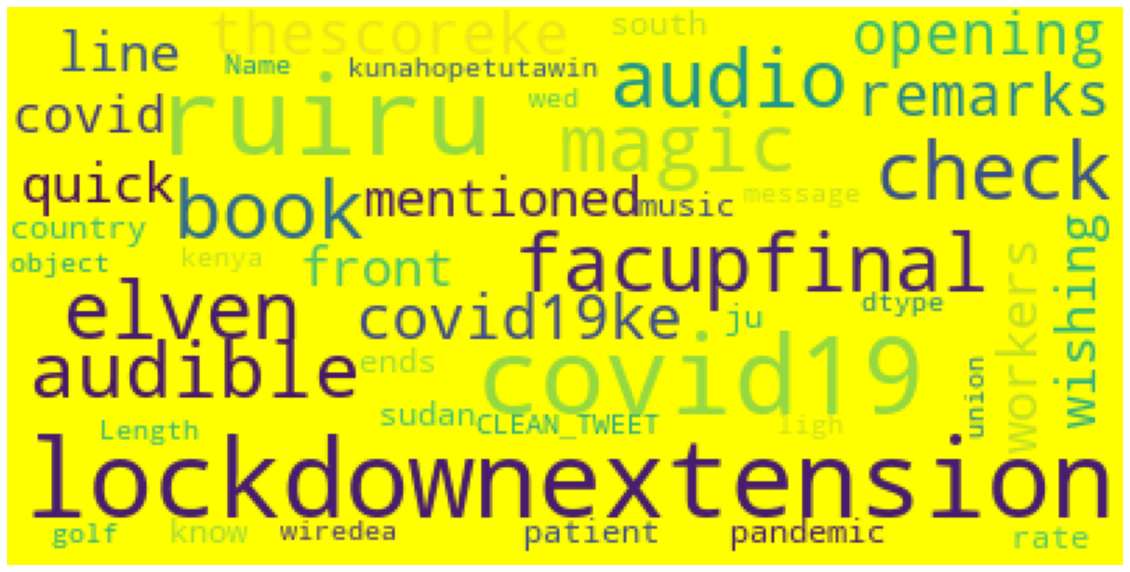

In [50]:
#Word Cloud

wordcloud__ = WordCloud(
                          background_color='yellow',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(new_df['CLEAN_TWEET'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

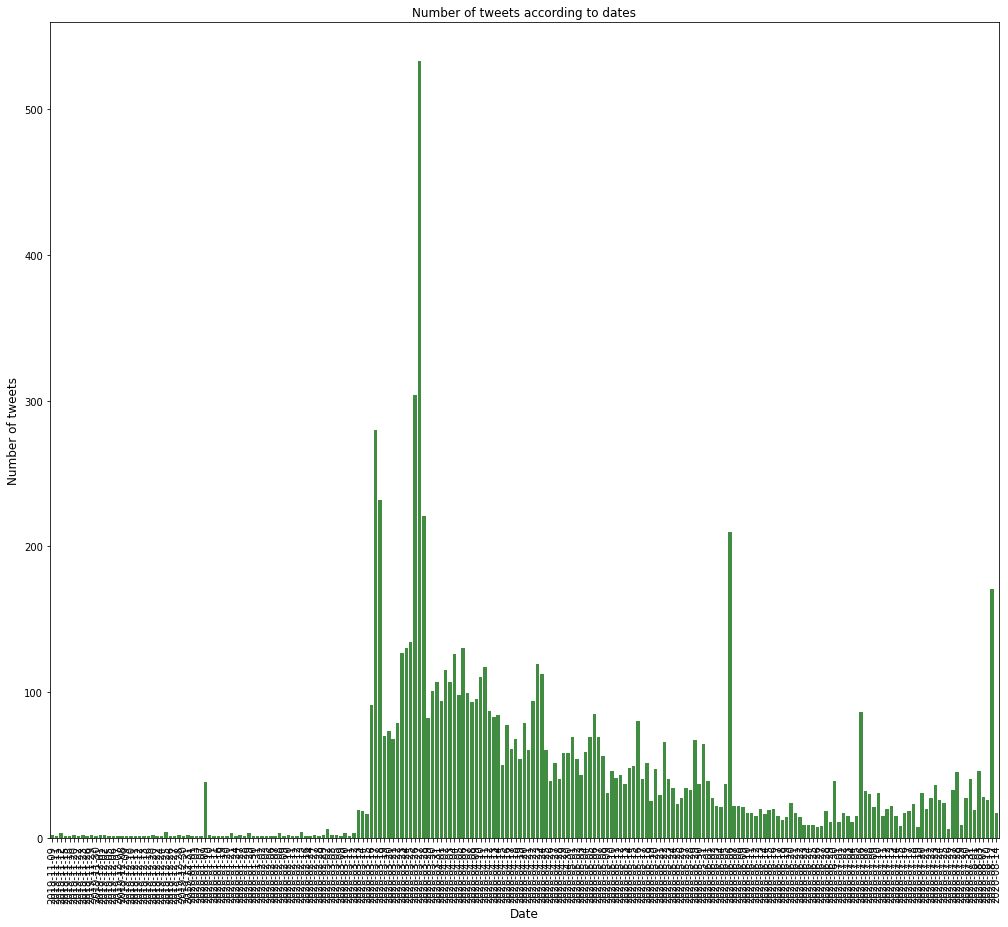

In [60]:
#The number of tweets according to dates

new_df['DATE'] =  pd.to_datetime(new_df['DATE'])
cnt_srs =new_df['DATE'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(17,15))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets according to dates")
plt.show()